# Health Insurance Claims Analysis with Pandas
Author: **Amer Sanjak**<br>
email:sanjakam@gmail.com

In this tutorial, we will examine claims data set that was extracted from a real life Electronic Medical Records Billing System that I designed, developed and implemented in the United States.  

Medical billing is a payment practice within the United States health system. The process involves a healthcare provider submitting, and following up on, claims with health insurance companies in order to receive payment for services rendered; such as treatments and investigations.

The DataFrame we will be examining contains the following columns:

1. **claimid:** This is the primary key for the claims DataFrame
1. **billedamount:** The amount billed by the provider to the insurance company for provided  to patient
1. **paidamount:** The amount paid by insurance company to provider for the claim
1. **status:** Claim status category
1. **dos:** Data of service
1. **paiddate:** Paid date by insurance company
1. **provider:** Provider name -  real provider name has been removed
1. **insurance:** Insurance company name
1. **patientid:** Patient medical record number 
1. **dob:** Patient's date of birth
1. **sex:** Patient gender
1. **year:** Year of Service. This column will be created later in this tutorial
1. **month:** Month of Service. This column will be created later in this tutorial
1. **balance:** Claim Balance which equals to (claims.billedamount - claims.paidamount). This column will be created later in this tutorial

**In this lesson, we will focus on the following task:**
1. Import packages
1. Load and examine the data set(claims.csv data file)
1. Data cleansing
1. Convert date string columns in DataFrame with the .to_datetime()
1. Creat new colums in the DataFrame
1. Claims Analysis

## 1. Import Packages

In [80]:
import sys
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from datetime import datetime
%matplotlib inline

**Style function**
You can apply conditional formatting, the visual styling of a DataFrame depending on the data within, by using the DataFrame.style property. This is a property that returns a pandas.Styler object, which has useful methods for formatting and displaying DataFrames. The styling is accomplished using CSS.

In [82]:
def color_negative(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: darkorange'` for negative
    strings, black otherwise.
    """
    color = 'darkorange' if val > 0 else 'black'
    return 'color: %s' % color
# s = df.style.applymap(color_negative_red)
# s

## 2. Load and examine the data set
Let's get started. The code shown in the cell below loads the data from the claims2008.csv file. Some minimal clean up is performed on the data. 

Execute the code in this cell to load the data into your notebook. **Make sure you have the claims2008.csv file in your working directory!**

In [83]:
%%time
# Read data
url = 'claims2008.csv'
claims = pd.read_csv(url, low_memory=False)

CPU times: user 29.6 ms, sys: 5.86 ms, total: 35.5 ms
Wall time: 32.8 ms


In [84]:
claims.shape

(10622, 11)

In [85]:
# Return the memory usage of each column in bytes
claims.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10622 entries, 0 to 10621
Data columns (total 11 columns):
dos             10622 non-null object
claimid         10622 non-null object
billedamount    10621 non-null float64
paidamount      10621 non-null float64
status          10621 non-null object
paiddate        10621 non-null object
provider        10621 non-null object
insurance       10621 non-null object
patientid       10621 non-null object
dob             10621 non-null object
sex             10621 non-null object
dtypes: float64(2), object(9)
memory usage: 6.1 MB


***
Here are the first few rows of your dataset. 

In [86]:
claims.head()

,dos,claimid,billedamount,paidamount,status,paiddate,provider,insurance,patientid,dob,sex
0,1/2/08,CL9386123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/08,CL9386,75.0,43.26,PAID,3/7/08,PROVIDER 1,BCBSM,PAT311,8/21/05,Female
2,1/2/08,CL9847,75.0,0.00,CAPITATION,3/13/08,PROVIDER 1,BCBSM,PAT311,8/21/05,Female
3,1/2/08,CL20234,75.0,0.00,CAPITATION,1/13/09,PROVIDER 1,MOLINA HEALTHCARE OF MICHIGAN,PAT739,3/16/05,Female
4,1/2/08,CL9383,75.0,0.00,CAPITATION,1/15/08,PROVIDER 1,MOLINA HEALTHCARE OF MICHIGAN,PAT795,3/30/97,Female


## 3. Data cleansing 
Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

<h5>&#9680; Examin if any value is NaN in a Pandas DataFrame </h5>


In [87]:
# examin the empty rows
empty_rows = claims[claims.isnull().T.any().T]
empty_rows.head()

,dos,claimid,billedamount,paidamount,status,paiddate,provider,insurance,patientid,dob,sex
0,1/2/08,CL9386123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h5>&#9680; Drop empty rows based on conditions </h5>

In [88]:
empty_value = claims.isnull().values.any()
if empty_value == True: 
    claims.dropna(how='any', inplace=True) ## drop rows  
    
# Alternative methods: 
#     claims.isnull().values.any()  ## Return Boolean (True or False)
#     claims.isnull().any().any() ## Return Boolean (True or False)
#     claims.isnull().values.sum() ## retrun NaN count
#     claims.isnull().sum().sum() ## retrun NaN count

***
## 4. Convert date string columns in DataFrames with the .to_datetime() method 

And let's confirm that the ***'dos, paiddate and dob'*** columns needs to be converted

In [89]:
claims.dtypes

dos              object
claimid          object
billedamount    float64
paidamount      float64
status           object
paiddate         object
provider         object
insurance        object
patientid        object
dob              object
sex              object
dtype: object

The date columns are string type. We can convert it to the datetime type with the .to_datetime() method.

In [90]:
# Convert date string columns in claims DataFrame with the .to_datetime() method 
claims["dos"] = pd.to_datetime(claims["dos"]) ## convert dos column
claims["dob"] = pd.to_datetime(claims["dob"])  ## convert dob column
claims["paiddate"] = pd.to_datetime(claims["paiddate"]) ## convert paiddate column

## 5. Creat new columns

``year, month, day of the week and claim balance``

In [91]:
# Creat new columns in a dataframe [year, month and balance]   
claims['year'] = pd.DatetimeIndex(claims['dos']).year
claims['month'] = pd.DatetimeIndex(claims['dos']).month
claims['day_of_week'] = claims['dos'].dt.weekday_name
claims['balance'] = claims['billedamount'] - claims['paidamount']

In [92]:
claims.head()

,dos,claimid,billedamount,paidamount,status,paiddate,provider,insurance,patientid,dob,sex,year,month,day_of_week,balance
1,2008-01-02,CL9386,75.0,43.26,PAID,2008-03-07,PROVIDER 1,BCBSM,PAT311,2005-08-21,Female,2008,1,Wednesday,31.74
2,2008-01-02,CL9847,75.0,0.00,CAPITATION,2008-03-13,PROVIDER 1,BCBSM,PAT311,2005-08-21,Female,2008,1,Wednesday,75.00
3,2008-01-02,CL20234,75.0,0.00,CAPITATION,2009-01-13,PROVIDER 1,MOLINA HEALTHCARE OF MICHIGAN,PAT739,2005-03-16,Female,2008,1,Wednesday,75.00
4,2008-01-02,CL9383,75.0,0.00,CAPITATION,2008-01-15,PROVIDER 1,MOLINA HEALTHCARE OF MICHIGAN,PAT795,1997-03-30,Female,2008,1,Wednesday,75.00
5,2008-01-02,CL9380,680.0,150.00,PAID,2008-01-15,PROVIDER 1,MOLINA HEALTHCARE OF MICHIGAN,PAT804,2003-12-16,Male,2008,1,Wednesday,530.00


## 6. Claims Header Analysis

### Summarizing, Aggregating, and Grouping data 

**Indexing pandas DataFrames with DatetimeIndex**

After we've converted the date column to the datetime format, it is usually a good idea to index our DataFrame by the date, creating the DatetimeIndex. Like the datetime type, the DatetimeIndex is a special index type designed to work with dates and times. By using the .set_index() method with the inplace argument set equal to True, we can remove the date column from our dataset and append it as the index of our DataFrame.

In [93]:
# Set index
claims.set_index('dos', inplace=True)

**Visits count Using unstack() method**

In [94]:
df_unstack = claims.groupby('status')['month'].value_counts().unstack().fillna(0)
df_unstack.style.applymap(color_negative)

month,1,2,3,4,5,6,7,8,9,10,11,12
status,,,,,,,,,,,,
CAPITATION,403,381,337,277,368,298,257,231,386,384,338,380
DENIED,213,26,44,57,44,34,26,25,28,23,25,26
PAID,581,460,448,507,399,480,514,520,622,574,461,444


**Visits count Using crosstab() method**

In [95]:
df_visits = pd.crosstab([claims["status"]],claims["month"],margins=True, margins_name="Total")
# call style function
df_visits.style.applymap(color_negative)

month,1,2,3,4,5,6,7,8,9,10,11,12,Total
status,,,,,,,,,,,,,
CAPITATION,403,381,337,277,368,298,257,231,386,384,338,380,4040
DENIED,213,26,44,57,44,34,26,25,28,23,25,26,571
PAID,581,460,448,507,399,480,514,520,622,574,461,444,6010
Total,1197,867,829,841,811,812,797,776,1036,981,824,850,10621


**Plot Visits count by month**

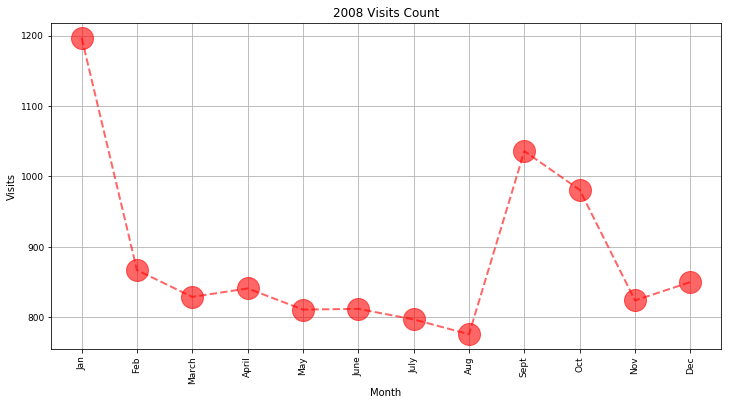

In [96]:
df = claims.groupby(['month'])['claimid'].count()
df.plot(kind = 'line',
        color='red', 
        grid=True, 
        figsize=(12,6),
        use_index =True,
        fontsize=9,
        sort_columns = True,
        rot=90, 
        marker='o', 
        linestyle='dashed',
        linewidth=2, 
        markersize=22,
        alpha=0.6)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.xlabel('Month') # Label x axis
plt.ylabel('Visits') # Label y axis
plt.title('2008 Visits Count')
plt.show()

**Partial string indexing and slicing**

Let's say we wanted to take a closer look at the claims count around the end of June  as seen in the graph above, we noticed drop on visits on that period. The following code uses partial string indexing and slicing to observe the number of transactions between dates range.

In [97]:
# df = claims.groupby('dos')['status'].value_counts().unstack().fillna(0)
df = claims.groupby(['dos'])[["claimid"]].count()
# Subset data 
claim_sliced = df['2008-06-20': '2008-07-10']
claim_sliced.head()

,claimid
dos,
2008-06-20,41
2008-06-23,38
2008-06-24,37
2008-06-25,33
2008-06-26,33


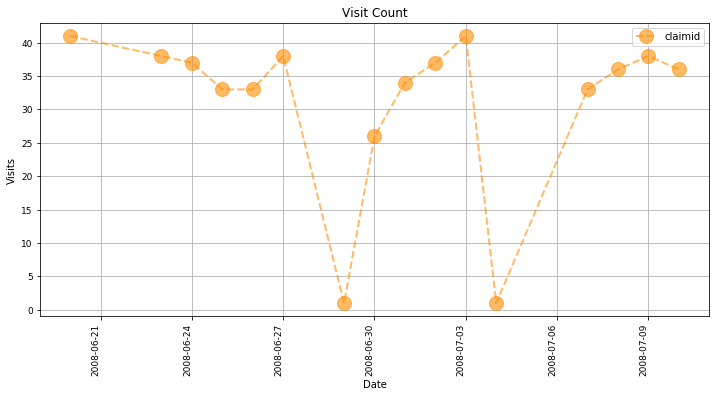

In [98]:
claim_sliced.plot(kind = 'line',
                  color='darkorange', 
                  grid=True, 
                  figsize=(12,6),
                  use_index =True,
                  fontsize=9,
                  sort_columns = True,
                  rot=90, 
                  marker='o', 
                  linestyle='dashed',
                  linewidth=2, 
                  markersize=14,
                  alpha=0.6)

plt.xlabel('Date') # Label x axis
plt.ylabel('Visits') # Label y axis
plt.title('Visit Count')
# plt.legend()
plt.show()


### Financial Data
sum amounts by month

In [99]:
claims_paid = claims[(claims.status =='PAID')]
df_summary = claims_paid.groupby(['month'])[["paidamount", "billedamount", "balance"]].sum()
df_summary

,paidamount,billedamount,balance
month,,,
1,44341.64,138932.5,94590.86
2,34761.97,108135.0,73373.03
3,34025.45,115705.0,81679.55
4,41659.04,138375.0,96715.96
5,30507.89,98160.0,67652.11
6,38146.88,128820.0,90673.12
7,41326.12,138090.0,96763.88
8,42824.06,145215.0,102390.94
9,50818.13,153340.0,102521.87


**Plot results**

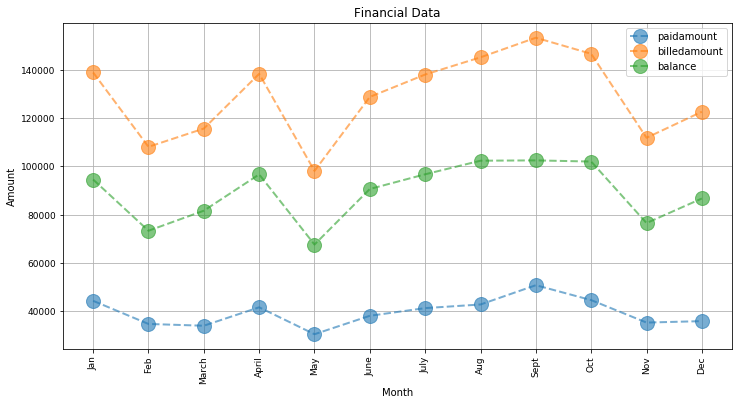

In [100]:
df_summary.plot(kind = 'line',
        grid=True, 
        figsize=(12,6),
        use_index =True,
        fontsize=9,
        sort_columns = True,
        rot=90, 
        marker='o', 
        linestyle='dashed',
        linewidth=2, 
        markersize=14,
        alpha=0.6)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.xlabel('Month') # Label x axis
plt.ylabel('Amount') # Label y axis
plt.title('Financial Data')

plt.show()

**Revenues by month using pivot table**

In [101]:
df = pd.pivot_table(claims,index=["month"],values=["paidamount"],aggfunc=np.sum)

Plot revenues by month

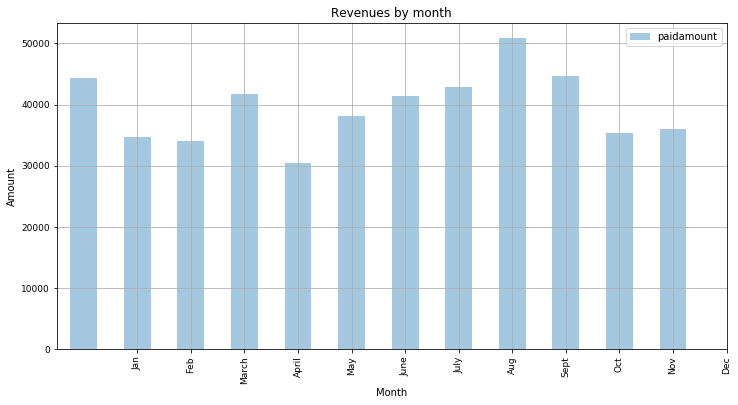

In [102]:
df.plot(kind = 'bar',
        grid=True, 
        figsize=(12,6),
        fontsize=9,
        alpha=0.4)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)
plt.xlabel('Month') # Label x axis
plt.ylabel('Amount') # Label y axis
plt.title('Revenues by month')
plt.show()

In [103]:
claims.groupby(['status'])['paidamount'].agg(['sum','count']).reset_index()

,status,sum,count
0,CAPITATION,0.00,4040
1,DENIED,0.00,571
2,PAID,474317.23,6010


**Visits count by Provider**

In [104]:
df_provider = pd.crosstab([claims.provider], claims.month,  margins=True)
# call style function
df_provider.head().style.applymap(color_negative)

month,1,2,3,4,5,6,7,8,9,10,11,12,All
provider,,,,,,,,,,,,,
PROVIDER 1,876,808,739,758,720,743,732,712,983,915,761,790,9537
PROVIDER 2,80,58,85,79,88,65,63,63,52,64,59,53,809
PROVIDER 3,167,0,0,0,0,0,0,0,0,0,0,0,167
PROVIDER 4,64,0,0,0,0,0,0,0,0,0,0,0,64
PROVIDER 5,10,1,5,4,3,4,2,0,1,1,3,4,38


**Descriptive Statistics**

In [105]:
# Descriptive or Summary Statistics in python pandas – describe()
list_include = [ 'float64']
claims.describe(include=list_include)

,billedamount,paidamount,balance
count,10621.000000,10621.000000,10621.000000
mean,188.199275,44.658434,143.540841
std,185.649109,54.302860,153.959300
min,0.000000,0.000000,-130.220000
25%,75.000000,0.000000,56.060000
50%,80.000000,29.570000,75.000000
75%,225.000000,77.940000,150.060000
max,1655.000000,700.220000,1508.070000


In [106]:
claims.groupby('sex')['paidamount'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,5361.0,44.761752,54.692853,0.0,0.0,29.57,77.94,521.00
Male,5260.0,44.553133,53.907471,0.0,0.0,29.57,77.94,700.22


### end of report